In [23]:
import logging
import pandas as pd
import numpy as np
from numpy import random
import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
import re
%matplotlib inline

df = pd.read_csv('data.csv')
# print(df['Corpus'].apply(lambda x: len(x.split(' '))).sum())
df.head(10)

,Index,Corpus
0,0,Internet Explorer 11 is no longer supported. W...
1,1,1 U.S. 406 (Dall.) Johnson v. Hocker Suprem...
2,2,1 U.S. 409 (Dall.) Steele v. Steele Supreme...
3,3,1 U.S. 411 (Dall.) Schlosser v. Lesher Cour...
4,4,"1 U.S. 415 (Dall.) Kennedy v. Nedrow, et Ux...."
5,5,"1 U.S. 420 (Dall.) Hamilton, Executor v. Cal..."
6,6,1 U.S. 424 (Dall.) The Lessee of Thompson et...
7,7,1 U.S. 428 (Dall.) D'Utricht v. Melchor Sup...
8,8,1 U.S. 430 (Dall.) Levinz v. Will Supreme C...
9,9,1 U.S. 436 (Dall.) Parker et al. v. Wood Su...


In [24]:
len(df.Corpus)

32125

In [25]:
## Model 

train_df = pd.DataFrame(pd.read_excel('train_data_classifier1.xlsx'))
print(train_df['sentence'].apply(lambda x: len(x.split(' '))).sum())
X_train = train_df.sentence
y_train = train_df.type
train_df.head()

107998


,Unnamed: 0,essay no.,sentence,has_argument,type
0,0,1,Should students be taught to compete or to coo...,False,-
1,1,1,It is always said that competition can effecti...,False,-
2,2,1,"In order to survive in the competition, compa...",False,-
3,3,1,"However, when we discuss the issue of competi...",False,-
4,4,1,"From this point of view, I firmly believe tha...",True,MajorClaim


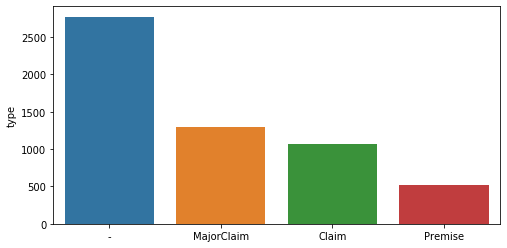

In [27]:
fig = plt.figure(figsize=(8,4))
sns.barplot(x = train_df['type'].unique(), y=train_df['type'].value_counts())
plt.show()

In [28]:
test_df = pd.DataFrame(pd.read_excel('test_data_classifier1.xlsx'))
test_df = test_df[pd.notnull(test_df['type'])]
X_test = test_df.sentence
y_test = test_df.type
test_df.head()

,Unnamed: 0,essay no.,sentence,has_argument,type
0,0,4,International tourism is now more common than ...,False,-
1,1,4,The last 50 years have seen a significant incr...,False,-
2,2,4,While some might think the tourism bring larg...,True,Claim
3,3,4,"Firstly, it is an undeniable fact that tourist...",True,Premise
4,4,4,"Take Thailand for example, in the Vietnam War...",True,Premise


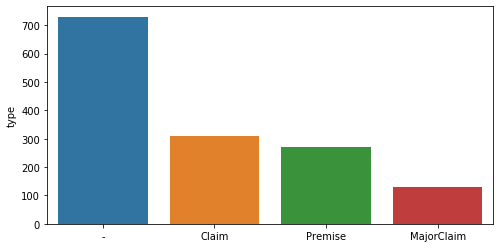

In [29]:
fig = plt.figure(figsize=(8,4))
sns.barplot(x = test_df['type'].unique(), y=test_df['type'].value_counts())
plt.show()

In [34]:
# Naive Bayes
# 1
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer

nb = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', MultinomialNB()),
              ])
nb = nb.fit(X_train, y_train)

from sklearn.metrics import classification_report
y_pred = nb.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred,target_names=my_types))

accuracy 0.5402777777777777
              precision    recall  f1-score   support

           -       0.73      0.16      0.27       311
       Claim       0.00      0.00      0.00       271
  MajorClaim       0.00      0.00      0.00       128
     Premise       0.53      1.00      0.69       730

    accuracy                           0.54      1440
   macro avg       0.31      0.29      0.24      1440
weighted avg       0.43      0.54      0.41      1440



C:\Users\Gurbaaz Singh Nandra\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [66]:
# SGD
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics import classification_report

sgd = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42, max_iter=100, tol=None)),
               ])
sgd = sgd.fit(X_train, y_train)


y_pred = sgd.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred,target_names=my_types))

accuracy 0.6006944444444444
              precision    recall  f1-score   support

           -       0.76      0.32      0.45       311
       Claim       0.60      0.03      0.06       271
  MajorClaim       0.60      0.30      0.40       128
     Premise       0.58      0.98      0.73       730

    accuracy                           0.60      1440
   macro avg       0.64      0.41      0.41      1440
weighted avg       0.63      0.60      0.52      1440



In [36]:
# Grid Search
from sklearn.model_selection import GridSearchCV
parameters = {'vect__ngram_range': [(1, 1), (1, 2)],
               'tfidf__use_idf': (True, False),
               'clf__alpha': (1e-2, 1e-3),
}

In [37]:
gs_nb = GridSearchCV(nb, parameters, n_jobs=-1)
gs_nb = gs_nb.fit(X_train, y_train)

C:\Users\Gurbaaz Singh Nandra\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


In [39]:
print(gs_nb.best_score_)
print(gs_nb.best_params_)

0.5750442477876107
{'clf__alpha': 0.01, 'tfidf__use_idf': False, 'vect__ngram_range': (1, 2)}


In [42]:
# Grid Search SVM
from sklearn.model_selection import GridSearchCV
parameters_svm = {'vect__ngram_range': [(1, 1), (1, 2)],
               'tfidf__use_idf': (True, False),
               'clf__alpha': (1e-2, 1e-3),
}
gs_svm = GridSearchCV(sgd, parameters_svm, n_jobs=-1)
gs_svm = gs_svm.fit(X_train, y_train)
print(gs_svm.best_score_)
print(gs_svm.best_params_)

C:\Users\Gurbaaz Singh Nandra\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


0.571858407079646
{'clf__alpha': 0.001, 'tfidf__use_idf': False, 'vect__ngram_range': (1, 2)}


In [127]:
## not abenefit in using grid search cv SVM

In [43]:
## Cleaning data.csv for ## Argument extraction

In [44]:
df.Corpus[0]

"Internet Explorer 11 is no longer supported. We recommend using\n            Google Chrome,\n            Firefox, or\n            Microsoft Edge. This was a bill in equity filed by 'His Excellency Edward Telfair, Esq. governor and commander in chief in and over the state of Georgia, in behalf of the said State, complainant;' against Samuel Brailsford, Robert Wm. Powell, and John Hopton, merchants and co-partners, and James Spalding, surviving partner of Kelsall & Spalding, defendants. The bill set forth the following case: \n Johnson, Justice. In order to support a motion for an injunction, the bill should set forth a case of probable right, and a probable danger that the right would be defeated, without this special interposition of the court. It does not appear to me, that the present bill sufficiently claims such an interposition. If the State has a right to the debt in question, it may be enforced at common law, notwithstanding the judgment of the Circuit court; and there is no su

In [51]:
df.Corpus = df.Corpus.str.replace('\n', '')

In [54]:
print(type(df.Corpus))
type(df.Corpus[0])

<class 'pandas.core.series.Series'>


str

In [64]:
df.Corpus = df.Corpus.str.split().str.join(' ')

In [85]:
len(sgd.predict(df.Corpus[0].split()))

2541

In [79]:
df.Corpus[0]

"Internet Explorer 11 is no longer supported. We recommend using Google Chrome, Firefox, or Microsoft Edge. This was a bill in equity filed by 'His Excellency Edward Telfair, Esq. governor and commander in chief in and over the state of Georgia, in behalf of the said State, complainant;' against Samuel Brailsford, Robert Wm. Powell, and John Hopton, merchants and co-partners, and James Spalding, surviving partner of Kelsall & Spalding, defendants. The bill set forth the following case: Johnson, Justice. In order to support a motion for an injunction, the bill should set forth a case of probable right, and a probable danger that the right would be defeated, without this special interposition of the court. It does not appear to me, that the present bill sufficiently claims such an interposition. If the State has a right to the debt in question, it may be enforced at common law, notwithstanding the judgment of the Circuit court; and there is no suggestion in the bill, though it has been s

In [125]:
## Building new dataframe
final_data = {}
final_data['Index'] = []
final_data['Normal'] = []
final_data['Premise'] = []
final_data['Major Claim'] = []
final_data['Claim'] = []

In [128]:
from tqdm import tqdm
i = 0

for k in tqdm(range(len(df.Corpus))):
    if isinstance(df.Corpus[k], str):      
        snts = df.Corpus[k].split()
        sz = len(snts)
        predictions = sgd.predict(snts)

        _ = []
        major_claim = []
        claim = []
        premise = []

        for j in range(sz):
            if predictions[j] == '-':
                _.append(snts[j])
            elif predictions[j] == 'MajorClaim':
                major_claim.append(snts[j])
            elif predictions[j] == 'Claim':
                claim.append(snts[j])
            else:
                premise.append(snts[j])


        final_data['Index'].append(i)
        final_data['Normal'].append(_)
        final_data['Premise'].append(premise)
        final_data['Major Claim'].append(major_claim)
        final_data['Claim'].append(claim)
        i += 1 

In [ ]:
final_df = pd.DataFrame(final_data, columns = ['Index', 'Normal','Premise','Major Claim','Claim'])

final_df.head()

In [ ]:
df.to_csv('data_processed.csv', index=False, header=True) 